# Table of contents 
1. [Import Data & Calculate Final Item Score](#import_data)
2. [Validation](#validate)
2. [Output Final Item Score](#output_final_item_score)
3. [Predcit Treatments For New Patients](#predict_treatments_for_new_patients)
    1. [Import New Patient CANS](#import_new_patient_cans)
    2. [Make Predictions](#make_predictions)

In [2]:
import sys
import seaborn as sns

In [4]:
%run linear_optimization.ipynb

## Import Data & Calculate Final Item Score <a name="import_data"></a>

data name: ibhs_all_imp and fbmhs_all_imp

In [5]:
ibhs_df = pd.read_csv('history_dataset/ibhs_all_improv_table_top_level.csv') 
fbmh_df = pd.read_csv('history_dataset/fbmhs_all_improv_table_top_level.csv')
print("There are ", ibhs_df.shape[0], "IBHS Patients")
print("There are ", fbmh_df.shape[0], "FBMH Patients")
print('Total, we have', ibhs_df.shape[0]+fbmh_df.shape[0], 'patients')

There are  3819 IBHS Patients
There are  2075 FBMH Patients
Total, we have 5894 patients


## Output Final Item Score<a name="output_final_item_score"></a>

In [8]:
final_need = twosum_improvement_xneed_all(ibhs_df, fbmh_df, batch_num = 100, n = 100)
write_to_final_needs(final_need, 'final_need_coefficient.csv')

## Predcit Treatments For New Patients <a name="predict_treatments_for_new_patients"></a> 

### Import New Patient CANS <a name="import_new_patient_cans"></a> 

In [17]:
validate_set_IBHS_raw = pd.read_csv('prediction_dataset/Example Cases for OR analysis - 2022-05-02.xlsx - IBHS_cans.csv')
old_validate_set_IBHS = validate_set_IBHS_raw[validate_set_IBHS_raw['timeline_ibhs'] == 'INITIAL']
validate_set_FBMH_raw = pd.read_csv('prediction_dataset/Example Cases for OR analysis - 2022-05-02.xlsx - FBMH_cans.csv')
old_validate_set_FBMH = validate_set_FBMH_raw[validate_set_FBMH_raw['timeline_fbmh'] == 'INITIAL']
needs_df = pd.read_csv('final_need_coefficient.csv')
needs = needs_df.to_numpy()[0]

column_names = needs_df.columns
validate_set_IBHS = old_validate_set_IBHS[column_names]
validate_set_FBMH = old_validate_set_FBMH[column_names]

print("There are {:,d} new patients".format(validate_set_IBHS.shape[0]+validate_set_FBMH.shape[0]))

There are 18,037 new patients


/Users/carayi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (98,104,105,106,199,203,207) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/carayi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Make Predictions <a name="make_predictions"></a> 

In [18]:
IBHS_need_matrix = validate_set_IBHS.to_numpy()
FBMH_need_matrix = validate_set_FBMH.to_numpy()
IBHS_patient_suggest = IBHS_need_matrix@needs
FBMH_patient_suggest = FBMH_need_matrix@needs

In [12]:
sum(IBHS_patient_suggest > 15)/len(IBHS_patient_suggest)

0.023225361819434874

In [15]:
sum(FBMH_patient_suggest <5)/len(FBMH_patient_suggest)

0.04224553444853984

Text(0, 0.5, 'Count')

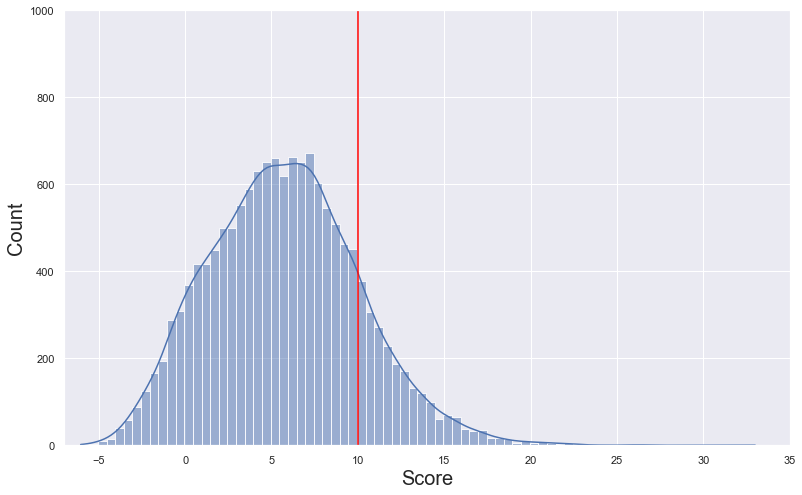

In [14]:
IBHS_patient_result = pd.DataFrame(IBHS_patient_suggest, columns = ['score'])

# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(13,8)})
p = sns.histplot(data=IBHS_patient_result, x="score", kde=True, binwidth = 0.5)
plt.plot([10, 10], [0, 1200], color = 'red') # add a red line at x = 0
plt.ylim(0, 1000)
plt.xlim(-7, 35)
p.set_xlabel('Score', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)
#p.set_title('Total Scores for IBHS Patients', fontsize = 20)

Text(0, 0.5, 'Count')

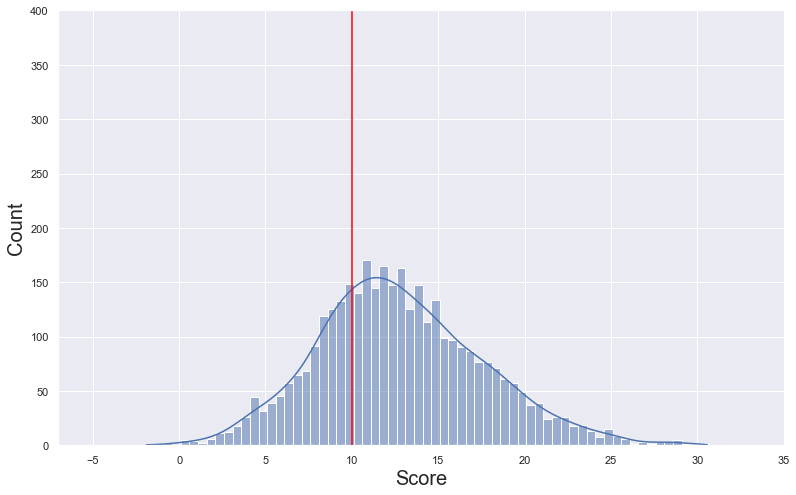

In [9]:
FBMH_patient_result = pd.DataFrame(FBMH_patient_suggest, columns = ['score'])

# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(13,8)})
p = sns.histplot(data=FBMH_patient_result, x="score", kde=True, binwidth = 0.5)
plt.plot([10, 10], [0, 1200], color = 'red') # add a red line at x = 0
plt.ylim(0, 400)
plt.xlim(-7, 35)
p.set_xlabel('Score', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)